# MNIST Convolutional Neural Net

## Erin Werner

### Step 1: Load Libraries

In [7]:
import numpy as np
import urllib
import scipy.optimize
import random
import matplotlib.pyplot as plt
from collections import Counter
import statistics
from operator import itemgetter
import json
from sklearn.metrics import mean_squared_error
from sklearn import svm
import math
from sklearn.utils import shuffle
import pandas as pd
from sklearn import datasets
from mlxtend.plotting import plot_decision_regions

In [2]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F
import torch.utils.data
from torch.autograd import Variable

### Step 2: Load & Transform Data

In [3]:
device = torch.device('cuda:0' if torch.cuda.is_available() else "cpu")

In [357]:
my_test = np.load("/Users/erinwerner/Downloads/ucsd-2019wi-cse151b-1/test/X_test_10k.npy")
X_train = np.load("/Users/erinwerner/Downloads/ucsd-2019wi-cse151b-1/train/X_train.npy")
y_train = np.load("/Users/erinwerner/Downloads/ucsd-2019wi-cse151b-1/train/y_train.npy")

In [358]:
reshape_Xtrain = []
for mnist in X_train:
    tmp = mnist.reshape((28, 28))
    reshape_Xtrain.append([tmp])

In [359]:
X_train = np.asarray(reshape_Xtrain)#, dtype = 'float64')

In [360]:
X_train = X_train.astype(np.float64)

In [361]:
reshape_test = []
for mnist in my_test:
    tmp = mnist.reshape((28,28))
    reshape_test.append([tmp])

In [362]:
my_test = np.asarray(reshape_test)
my_test = my_test.astype(np.float64)

In [363]:
dummy_y = list(range(len(test)))
dummy_y = np.asarray(dummy_y)

### Step 3: Initialize CNN Input

In [238]:
num_epochs = 10
num_classes = 10
batch_size = 100
learning_rate = 0.001

In [257]:
torch_X_train = torch.from_numpy(X_train).type(torch.LongTensor)
torch_y_train = torch.from_numpy(y_train).type(torch.LongTensor) # data type is long

In [242]:
train = torch.utils.data.TensorDataset(torch_X_train,torch_y_train)

In [243]:
train_loader = torch.utils.data.DataLoader(dataset = train, batch_size = batch_size, shuffle = False)

In [429]:
val_X = X_train[0:30000]
val_y = y_train[0:30000]

torch_X_val = torch.from_numpy(val_X).type(torch.DoubleTensor)
torch_y_val = torch.from_numpy(val_y).type(torch.LongTensor)
val = torch.utils.data.TensorDataset(torch_X_val,torch_y_val)
validation_loader = torch.utils.data.DataLoader(dataset = val, batch_size = batch_size, shuffle = False)

### Step 4: Create 3-Layer CNN Model

This 3-Layer CNN Model will serve as a baseline model for comparison.

In [244]:
class ConvNet(nn.Module):
    def __init__(self, num_classes=10):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1,16,kernel_size=5,stride=1,padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(16,32,kernel_size=5,stride=1,padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2))
        self.fc = nn.Linear(7*7*32,num_classes)
        
    def forward(self,x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0),-1)
        out = self.fc(out)
        return(out)

In [263]:
model = ConvNet()
model = model.double()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

training_loss = []

total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images,labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        loss = criterion(outputs,Variable(labels.long()))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1)%100 == 0:
            training_loss.append(loss.item())
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch+1,num_epochs,i+1,total_step,loss.item()))

Epoch [1/10], Step [100/600], Loss: 1.8491
Epoch [1/10], Step [200/600], Loss: 1.6272
Epoch [1/10], Step [300/600], Loss: 1.3991
Epoch [1/10], Step [400/600], Loss: 1.1686
Epoch [1/10], Step [500/600], Loss: 0.9820
Epoch [1/10], Step [600/600], Loss: 0.8647
Epoch [2/10], Step [100/600], Loss: 0.5661
Epoch [2/10], Step [200/600], Loss: 0.6847
Epoch [2/10], Step [300/600], Loss: 0.7281
Epoch [2/10], Step [400/600], Loss: 0.5911
Epoch [2/10], Step [500/600], Loss: 0.5512
Epoch [2/10], Step [600/600], Loss: 0.5101
Epoch [3/10], Step [100/600], Loss: 0.3033
Epoch [3/10], Step [200/600], Loss: 0.4327
Epoch [3/10], Step [300/600], Loss: 0.5439
Epoch [3/10], Step [400/600], Loss: 0.4208
Epoch [3/10], Step [500/600], Loss: 0.3995
Epoch [3/10], Step [600/600], Loss: 0.3979
Epoch [4/10], Step [100/600], Loss: 0.2122
Epoch [4/10], Step [200/600], Loss: 0.3221
Epoch [4/10], Step [300/600], Loss: 0.4551
Epoch [4/10], Step [400/600], Loss: 0.3385
Epoch [4/10], Step [500/600], Loss: 0.3228
Epoch [4/10

In [266]:
iter = [1,2,3,4,5,6,7,8,9,10,
       11,12,13,14,15,16,17,18,19,20,
       21,22,23,24,25,26,27,28,29,30,
       31,32,33,34,35,36,37,38,39,40,
       41,42,43,44,45,46,47,48,49,50,
       51,52,53,54,55,56,57,58,59,60]

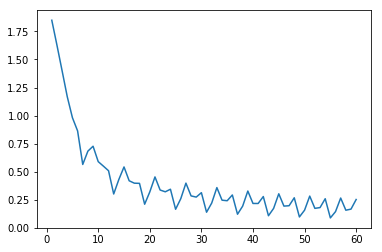

In [267]:
plt.plot(iter,training_loss)

### Step 5: Create 4-Layer CNN Model

In [426]:
num_epochs = 10
num_classes = 10
batch_size = 100
learning_rate = 0.001

In [427]:
class myConvNet(nn.Module):
    def __init__(self, num_classes=10):
        super(myConvNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1,32,kernel_size=5,stride=1,padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(32,32,kernel_size=5,stride=1,padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2))
        self.layer3 = nn.Sequential(
            nn.Conv2d(32,64,kernel_size=5,stride=1,padding=2),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2))
        self.fc = nn.Linear(3*3*64,num_classes)
        
    def forward(self,x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = out.reshape(out.size(0),-1)
        out = self.fc(out)
        return(out)

In [277]:
model = myConvNet()
model = model.double()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

my_training_loss = []

total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images,labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        loss = criterion(outputs,Variable(labels.long()))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1)%600 == 0:
            my_training_loss.append(loss.item())
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch+1,num_epochs,i+1,total_step,loss.item()))

Epoch [1/10], Step [600/600], Loss: 0.7658
Epoch [2/10], Step [600/600], Loss: 0.4517
Epoch [3/10], Step [600/600], Loss: 0.3414
Epoch [4/10], Step [600/600], Loss: 0.2866
Epoch [5/10], Step [600/600], Loss: 0.2550
Epoch [6/10], Step [600/600], Loss: 0.2347
Epoch [7/10], Step [600/600], Loss: 0.2210
Epoch [8/10], Step [600/600], Loss: 0.2111
Epoch [9/10], Step [600/600], Loss: 0.2038
Epoch [10/10], Step [600/600], Loss: 0.1980


In [278]:
iter = [1,2,3,4,5,6,7,8,9,10]

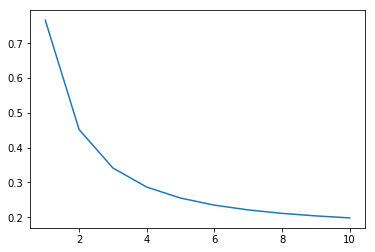

In [280]:
plt.plot(iter,my_training_loss)

In [339]:
def create_submission(predictions, fname="submission.csv"):
    """
            `predictions` - numpy array of dimension (n_samples,)
    """
    with open(fname, 'w') as f:
        f.write("Id,Category")
        for idx,yhat in enumerate(predictions):
            f.write("\n{},{}".format(idx,yhat))

In [364]:
torch_X_test = torch.from_numpy(my_test).type(torch.DoubleTensor) # data type is long
torch_y_test = torch.from_numpy(dummy_y).type(torch.LongTensor)
test = torch.utils.data.TensorDataset(torch_X_test,torch_y_test)
test_loader = torch.utils.data.DataLoader(dataset = test, batch_size = batch_size, shuffle = False)

In [367]:
test_predictions = []
for i, (images,labels) in enumerate(test_loader):
    images = images.to(device)
    
    outputs = model(images)
    
    _, predicted = torch.max(outputs.data,1)
    test_predictions.append(predicted)

In [381]:
my_predictions = []
for tf in test_predictions:
    for val in tf:
        my_predictions.append(val.item())

In [383]:
create_submission(my_predictions, fname="werner_submission.csv") #96% Test Accuracy

In [433]:
model = myConvNet()
model = model.double()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

my_val_loss = []

total_step = len(validation_loader)
for epoch in range(num_epochs):
    for i, (images,labels) in enumerate(validation_loader):
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        loss = criterion(outputs,Variable(labels.long()))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1)%300 == 0:
            my_val_loss.append(loss.item())
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch+1,num_epochs,i+1,total_step,loss.item()))

Epoch [1/10], Step [300/300], Loss: 1.4418
Epoch [2/10], Step [300/300], Loss: 0.9053
Epoch [3/10], Step [300/300], Loss: 0.6481
Epoch [4/10], Step [300/300], Loss: 0.5073
Epoch [5/10], Step [300/300], Loss: 0.4206
Epoch [6/10], Step [300/300], Loss: 0.3613
Epoch [7/10], Step [300/300], Loss: 0.3186
Epoch [8/10], Step [300/300], Loss: 0.2859
Epoch [9/10], Step [300/300], Loss: 0.2606
Epoch [10/10], Step [300/300], Loss: 0.2406


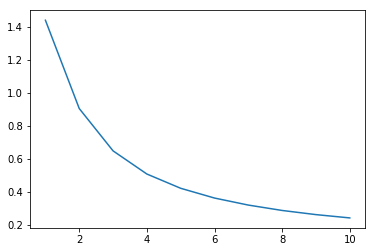

In [434]:
plt.plot(iter,my_val_loss)

In [435]:
cnn_loss = pd.DataFrame(
    {'Epoch': iter,
     'Training Loss': my_training_loss,
     'Validation Loss': my_val_loss
    })

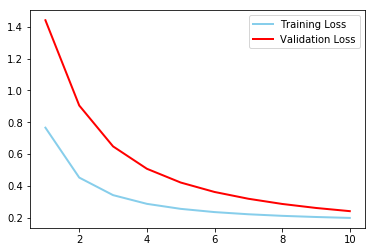

In [436]:
plt.plot( 'Epoch', 'Training Loss', data=cnn_loss, color='skyblue', linewidth=2)
plt.plot( 'Epoch', 'Validation Loss', data=cnn_loss, color='red', linewidth=2)
plt.legend()

### Step 6: Create 2-Layer CNN Model

In [444]:
num_epochs = 10
num_classes = 10
batch_size = 100
learning_rate = 0.001

In [445]:
X_t = X_train[30000:60000]
y_t = y_train[30000:60000]

torch_X_train = torch.from_numpy(X_t).type(torch.DoubleTensor)
torch_y_train = torch.from_numpy(y_t).type(torch.LongTensor) # data type is long
train = torch.utils.data.TensorDataset(torch_X_train,torch_y_train)
train_loader = torch.utils.data.DataLoader(dataset = train, batch_size = batch_size, shuffle = False)

In [446]:
val_X = X_train[0:30000]
val_y = y_train[0:30000]

torch_X_val = torch.from_numpy(val_X).type(torch.DoubleTensor)
torch_y_val = torch.from_numpy(val_y).type(torch.LongTensor)
val = torch.utils.data.TensorDataset(torch_X_val,torch_y_val)
validation_loader = torch.utils.data.DataLoader(dataset = val, batch_size = batch_size, shuffle = False)

In [467]:
class myShallowConvNet(nn.Module):
    def __init__(self, num_classes=10):
        super(myShallowConvNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1,32,kernel_size=5,stride=1,padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.fc = nn.Linear(14*14*32,num_classes)
        
    def forward(self,x):
        out = self.layer1(x)
        out = out.reshape(out.size(0),-1)
        out = self.fc(out)
        return(out)

In [468]:
model = myShallowConvNet()
model = model.double()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

my_shallow_training_loss = []

total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images,labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        loss = criterion(outputs,Variable(labels.long()))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1)%300 == 0:
            my_shallow_training_loss.append(loss.item())
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch+1,num_epochs,i+1,total_step,loss.item()))

Epoch [1/10], Step [300/300], Loss: 0.8391
Epoch [2/10], Step [300/300], Loss: 0.5759
Epoch [3/10], Step [300/300], Loss: 0.4716
Epoch [4/10], Step [300/300], Loss: 0.4148
Epoch [5/10], Step [300/300], Loss: 0.3784
Epoch [6/10], Step [300/300], Loss: 0.3525
Epoch [7/10], Step [300/300], Loss: 0.3329
Epoch [8/10], Step [300/300], Loss: 0.3174
Epoch [9/10], Step [300/300], Loss: 0.3048
Epoch [10/10], Step [300/300], Loss: 0.2941


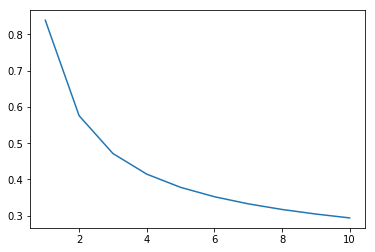

In [469]:
plt.plot(iter,my_shallow_training_loss)

In [470]:
test_shallow_predictions = []
for i, (images,labels) in enumerate(test_loader):
    images = images.to(device)
    
    outputs = model(images)
    
    _, predicted = torch.max(outputs.data,1)
    test_shallow_predictions.append(predicted)

In [471]:
my_shallow_predictions = []
for tf in test_shallow_predictions:
    for val in tf:
        my_shallow_predictions.append(val.item())

In [472]:
create_submission(my_shallow_predictions, fname="werner_shallow_submission.csv") #84% Test Accuracy

In [473]:
model = myShallowConvNet()
model = model.double()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

my_shallow_val_loss = []

total_step = len(validation_loader)
for epoch in range(num_epochs):
    for i, (images,labels) in enumerate(validation_loader):
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        loss = criterion(outputs,Variable(labels.long()))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1)%300 == 0:
            my_shallow_val_loss.append(loss.item())
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch+1,num_epochs,i+1,total_step,loss.item()))

Epoch [1/10], Step [300/300], Loss: 0.8682
Epoch [2/10], Step [300/300], Loss: 0.6713
Epoch [3/10], Step [300/300], Loss: 0.5917
Epoch [4/10], Step [300/300], Loss: 0.5441
Epoch [5/10], Step [300/300], Loss: 0.5093
Epoch [6/10], Step [300/300], Loss: 0.4813
Epoch [7/10], Step [300/300], Loss: 0.4573
Epoch [8/10], Step [300/300], Loss: 0.4357
Epoch [9/10], Step [300/300], Loss: 0.4161
Epoch [10/10], Step [300/300], Loss: 0.3981


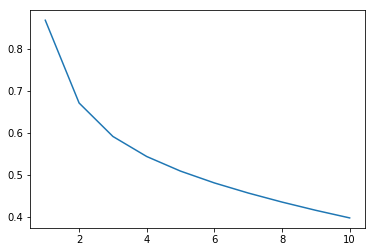

In [474]:
plt.plot(iter,my_shallow_val_loss)

In [475]:
cnn_shallow_loss = pd.DataFrame(
    {'Epoch': iter,
     'Training Loss': my_shallow_training_loss,
     'Validation Loss': my_shallow_val_loss
    })

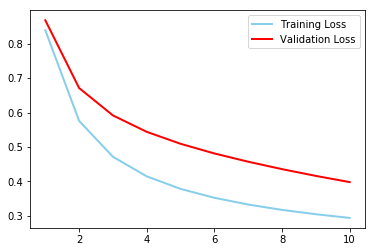

In [476]:
plt.plot( 'Epoch', 'Training Loss', data=cnn_shallow_loss, color='skyblue', linewidth=2)
plt.plot( 'Epoch', 'Validation Loss', data=cnn_shallow_loss, color='red', linewidth=2)
plt.legend()